In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from dataset import MNIST_Moving
from model import Model
import utils


In [3]:
# Adding dataloader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda
Data loaders ready


In [ ]:

transform = transforms.Compose([transforms.ToTensor(),
                    transforms.Resize((64, 64)),
                   ])
# [TODO]
# And visualize the input images using the vis function

train_set = MNIST_Moving(root='.data/mnist', train=True, download=True, transform=transform, target_transform=transform)
test_set = MNIST_Moving(root='.data/mnist', train=False, download=True, transform=transform, target_transform=transform)

batch_size = 1

train_loader = torch.utils.data.DataLoader(
                dataset=train_set,
                batch_size=batch_size,
                shuffle=False)

test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)
print("Data loaders ready")


In [4]:
model = Model()
print("Model Loaded")
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)

Model Loaded


In [5]:
# train_loss, test_loss, loss_iter, epochs = utils.train_model(model, optimizer, scheduler, criterion,\
#                                                         train_loader, test_loader, 100, device)


In [6]:
model, _, _ = utils.loading_model(model, "models/model_7.pth")

In [7]:
# test_tensor = torch.rand((16, 20, 1, 64, 64)).to(device)
# # test_tensor = test_tensor.reshape(-1, 1, 64, 64)
# model(test_tensor).shape

In [8]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show(grid, name):
    fix, axs = plt.subplots()
    fix.set_size_inches(25,8)

    axs.imshow(grid.cpu().numpy().transpose(1,2,0))
    axs.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
#     fix.savefig(f"{name}.pdf", format="pdf", bbox_inches="tight")
#     fix.show()

def visualize_results(model, test_loader, device):
    test_input, test_target = next(iter(test_loader))
    
    test_input = test_input.to(device)
    test_target = test_target.to(device)
    
    model.eval() 
    
    predictions = model(test_input)
    predictions = predictions.to(device)
    print(test_target[0].max())
    grid_gt = make_grid(test_target[0])
    show(grid_gt, "gt")

    grid_out = make_grid(predictions[0])
    
    show(grid_out, "output")
#     grid_out = make_grid(predictions[0])
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_18668/3704528869.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fix.show()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


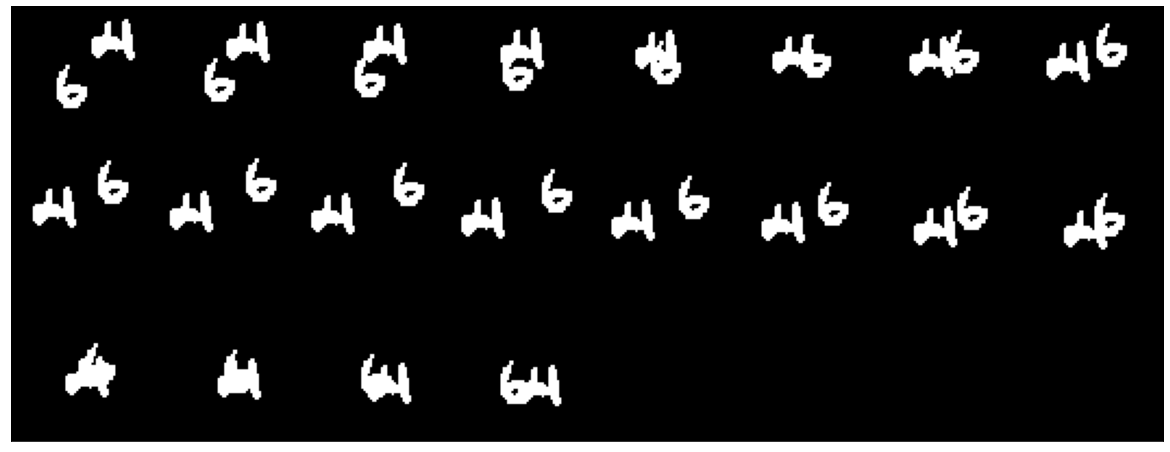

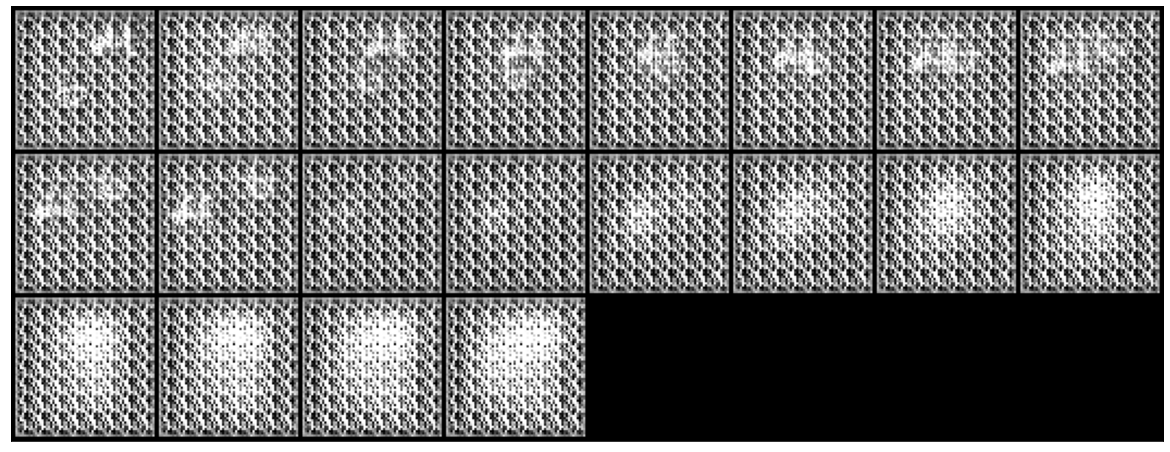

In [9]:
visualize_results(model, test_loader, device)

2643317760
2643317760
